# Acceptance x Efficiency for VLL Singlet and Doublet

Final states I am interested in:
- 4L inclusive
- Exactly 3L
- Exactly 2L and same-sign
- Exactly 2L and opposite-sign
- Exactly 1L and jets (0, 1, 2+)

In [1]:
import ROOT
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/10


In [2]:
from datetime import datetime

datestamp = datetime.today().strftime('%Y-%m-%d')
plotdir = 'plots/'+datestamp
os.system(f'mkdir -p {plotdir}')

print('Plot directory ready!')

Plot directory ready!


### Printing out the raw numbers and showing the plot along-with

In [3]:
thin_line = {
    'marker':'o',
    'linestyle':'--',
    'markersize':3,
    'linewidth':1
}
thick_line = {
    'marker':'o',
    'linestyle':'-',
    'markersize':4,
    'linewidth':2
}

masses = [100, 125, 150, 200, 250, 300, 350, 400, 450, 500, 600, 750, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200]
channel_dict = {
    '1L0J':{'color':'yellow',},
    '1L1J':{'color':'gold'},
    '1L2J':{'color':'orange'},
    '2LOS':{'color':'blue'},
    '2LSS':{'color':'cyan'},
    '3L'  :{'color':'green'},
    '4L'  :{'color':'red'}
}

def accp(num, den):
    if den==0 : return 0
    else : return (num/den)*100

In [4]:
def print_info(model, flav):
    global channel_dict
    global thin_line
    global thick_line
    
    print('-' * 25 + f'\nFor the model {model}_{flav}\n' + '-' * 25)
    print(f'mass\tnAll\tn1L0J\t\tn1L1J\t\tn1L2J\t\tn2LOS\t\tn2LSS\t\tn3L\t\tn4L')

    data_list = []

    for mass in masses:
        
        
        filename = f'../input_files/hst_{model}_{flav}_M{mass}.root'
        file_exists = os.path.exists(filename)
        if file_exists:
            tfile = ROOT.TFile(filename)
            hist = tfile.Get(f'finalstates_incldecay')
            nall = hist.GetBinContent(1)

            print(f'{mass}\t{int(nall)}', end='\t')
            row_dict = {'mass': mass, 'nAll': int(nall)}

            index = 2
            for channel, info in channel_dict.items():
                nevt_ch = hist.GetBinContent(index)
                accp_ch = accp(nevt_ch, nall)
                index = index + 1

                print(f'{int(nevt_ch)} ({accp_ch:.1f}%)', end='\t')
                row_dict[channel] = accp_ch

            data_list.append(row_dict)

    # Create a DataFrame from the list of dictionaries
    df = pd.DataFrame(data_list)
    
    #print('\n\nDataframe containing the acceptance values:')
    #display(df)
    
    #Setting up x and y values from the dataframe.
    x_axis = df['mass'].values
    y_axis = channel_dict = {
        '1L0J':{'color':'yellow',},
        '1L1J':{'color':'gold'},
        '1L2J':{'color':'orange'},
        '2LOS':{'color':'blue'},
        '2LSS':{'color':'cyan'},
        '3L'  :{'color':'green'},
        '4L'  :{'color':'red'}
    }
    for channel, info in y_axis.items():
        y_axis[channel]['acceptance'] =  df[channel].values
        
    fig, ax = plt.subplots(1, 1, figsize=(4, 4))
    for channel, info in y_axis.items():
        ax.plot(x_axis, y_axis[channel]['acceptance'], color=y_axis[channel]['color'], label=channel, **thin_line)

    y_multilep = y_axis['2LOS']['acceptance'] + y_axis['2LSS']['acceptance'] + y_axis['3L']['acceptance'] + y_axis['4L']['acceptance']
    y_combined = y_multilep + y_axis['1L0J']['acceptance'] + y_axis['1L1J']['acceptance'] + y_axis['1L2J']['acceptance']
    
    ax.plot(x_axis, y_multilep, color='gray',  label='multilep', **thick_line)
    ax.plot(x_axis, y_combined, color='black', label='combined', **thick_line)
    ax.set_title(f'{model} {flav}', fontsize=14)
    ax.set_xlabel('Mass (GeV)', fontsize=12)
    ax.set_ylabel('acc*eff (%)', fontsize=12)
    ax.set_ylim(0, 100)
    ax.set_xlim(0, x_axis[-1]*1.5)
    ax.grid(True)
    ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.savefig(f'{plotdir}/acceptance_{model}_{flav}.png', dpi=300)
    plt.show()

### VLL Singlet (electron type)

-------------------------
For the model VLLS_ele
-------------------------
mass	nAll	n1L0J		n1L1J		n1L2J		n2LOS		n2LSS		n3L		n4L
100	599740	31270 (5.2%)	55237 (9.2%)	40900 (6.8%)	18868 (3.1%)	1037 (0.2%)	1891 (0.3%)	199 (0.0%)	125	594714	27912 (4.7%)	62070 (10.4%)	64762 (10.9%)	49901 (8.4%)	3818 (0.6%)	8755 (1.5%)	2412 (0.4%)	150	598626	24356 (4.1%)	62416 (10.4%)	73093 (12.2%)	69306 (11.6%)	5003 (0.8%)	11825 (2.0%)	3826 (0.6%)	200	598182	18536 (3.1%)	55392 (9.3%)	76615 (12.8%)	91289 (15.3%)	6096 (1.0%)	14766 (2.5%)	5520 (0.9%)	250	496991	12354 (2.5%)	40499 (8.1%)	63069 (12.7%)	85773 (17.3%)	5322 (1.1%)	13446 (2.7%)	5382 (1.1%)	300	498516	10251 (2.1%)	36265 (7.3%)	62183 (12.5%)	92027 (18.5%)	5627 (1.1%)	14205 (2.8%)	5953 (1.2%)	350	199194	3441 (1.7%)	13166 (6.6%)	24016 (12.1%)	38642 (19.4%)	2293 (1.2%)	5900 (3.0%)	2669 (1.3%)	400	199048	3178 (1.6%)	12379 (6.2%)	23338 (11.7%)	39454 (19.8%)	2423 (1.2%)	6031 (3.0%)	2744 (1.4%)	450	194893	2862 (1.5%)	11438 (5.9%)	22816 (11.7%)	39925 (20.5%)

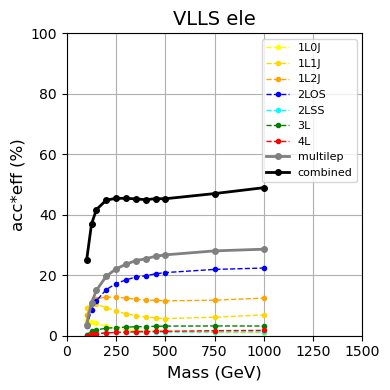

In [5]:
print_info('VLLS', 'ele') 

### VLL Singlet (muon type)

-------------------------
For the model VLLS_mu
-------------------------
mass	nAll	n1L0J		n1L1J		n1L2J		n2LOS		n2LSS		n3L		n4L
100	594746	31597 (5.3%)	57450 (9.7%)	44357 (7.5%)	20892 (3.5%)	1283 (0.2%)	2650 (0.4%)	396 (0.1%)	125	599690	31495 (5.3%)	68960 (11.5%)	72573 (12.1%)	69033 (11.5%)	4328 (0.7%)	10673 (1.8%)	3869 (0.6%)	150	598660	27131 (4.5%)	66584 (11.1%)	78599 (13.1%)	92368 (15.4%)	4765 (0.8%)	13623 (2.3%)	5776 (1.0%)	200	599555	20292 (3.4%)	58898 (9.8%)	80718 (13.5%)	116527 (19.4%)	5266 (0.9%)	16055 (2.7%)	7347 (1.2%)	250	496540	13127 (2.6%)	42048 (8.5%)	65054 (13.1%)	107369 (21.6%)	4390 (0.9%)	14679 (3.0%)	6878 (1.4%)	300	499438	10522 (2.1%)	37224 (7.5%)	63859 (12.8%)	113686 (22.8%)	4502 (0.9%)	15202 (3.0%)	7605 (1.5%)	400	198686	3352 (1.7%)	12443 (6.3%)	23898 (12.0%)	48031 (24.2%)	1746 (0.9%)	6504 (3.3%)	3429 (1.7%)	450	197673	3027 (1.5%)	11879 (6.0%)	23516 (11.9%)	48249 (24.4%)	1674 (0.8%)	6382 (3.2%)	3475 (1.8%)	500	199603	2797 (1.4%)	11499 (5.8%)	23623 (11.8%)	49776 (24

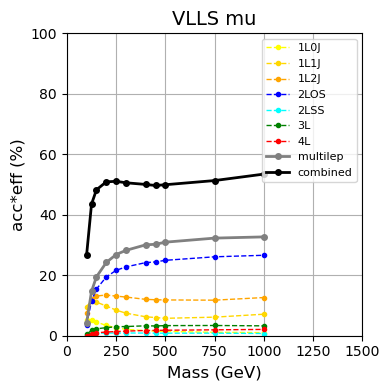

In [6]:
print_info('VLLS', 'mu') 

### VLL Doublet (electron type)

-------------------------
For the model VLLD_ele
-------------------------
mass	nAll	n1L0J		n1L1J		n1L2J		n2LOS		n2LSS		n3L		n4L
100	110871	4863 (4.4%)	10777 (9.7%)	12544 (11.3%)	15166 (13.7%)	4147 (3.7%)	4586 (4.1%)	570 (0.5%)	200	73730	905 (1.2%)	3277 (4.4%)	5668 (7.7%)	29544 (40.1%)	3330 (4.5%)	8341 (11.3%)	1763 (2.4%)	300	24753	131 (0.5%)	599 (2.4%)	1341 (5.4%)	11327 (45.8%)	1078 (4.4%)	3313 (13.4%)	766 (3.1%)	400	24491	69 (0.3%)	383 (1.6%)	1036 (4.2%)	11926 (48.7%)	1098 (4.5%)	3417 (14.0%)	823 (3.4%)	600	24611	80 (0.3%)	391 (1.6%)	1042 (4.2%)	11785 (47.9%)	1121 (4.6%)	3558 (14.5%)	781 (3.2%)	800	23680	27 (0.1%)	212 (0.9%)	773 (3.3%)	12160 (51.4%)	1094 (4.6%)	3829 (16.2%)	872 (3.7%)	1000	24286	28 (0.1%)	221 (0.9%)	805 (3.3%)	12680 (52.2%)	1124 (4.6%)	3856 (15.9%)	973 (4.0%)	1200	24336	23 (0.1%)	226 (0.9%)	927 (3.8%)	12629 (51.9%)	1109 (4.6%)	4033 (16.6%)	1038 (4.3%)	1400	24301	27 (0.1%)	238 (1.0%)	953 (3.9%)	12768 (52.5%)	1082 (4.5%)	4047 (16.7%)	1012 (4.2%)	1600	24388	16 (0.1%)	26

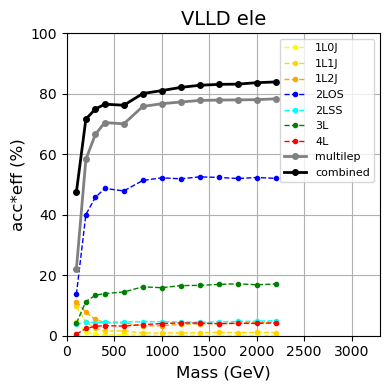

In [7]:
print_info('VLLD', 'ele') 

### VLL Doublet (muon type)

-------------------------
For the model VLLD_mu
-------------------------
mass	nAll	n1L0J		n1L1J		n1L2J		n2LOS		n2LSS		n3L		n4L
100	111926	5240 (4.7%)	11059 (9.9%)	13288 (11.9%)	25886 (23.1%)	4089 (3.7%)	8656 (7.7%)	1102 (1.0%)	200	73908	969 (1.3%)	2748 (3.7%)	4241 (5.7%)	40193 (54.4%)	1883 (2.5%)	10904 (14.8%)	2461 (3.3%)	300	25022	120 (0.5%)	499 (2.0%)	985 (3.9%)	14666 (58.6%)	566 (2.3%)	4152 (16.6%)	972 (3.9%)	400	24299	55 (0.2%)	278 (1.1%)	684 (2.8%)	14803 (60.9%)	516 (2.1%)	4310 (17.7%)	1004 (4.1%)	600	24890	26 (0.1%)	183 (0.7%)	520 (2.1%)	15457 (62.1%)	476 (1.9%)	4664 (18.7%)	1068 (4.3%)	800	24763	21 (0.1%)	168 (0.7%)	513 (2.1%)	15568 (62.9%)	451 (1.8%)	4608 (18.6%)	1194 (4.8%)	1200	24557	20 (0.1%)	192 (0.8%)	581 (2.4%)	15459 (63.0%)	420 (1.7%)	4622 (18.8%)	1236 (5.0%)	1400	24798	13 (0.1%)	193 (0.8%)	629 (2.5%)	15576 (62.8%)	436 (1.8%)	4755 (19.2%)	1193 (4.8%)	1600	24757	13 (0.1%)	231 (0.9%)	684 (2.8%)	15719 (63.5%)	404 (1.6%)	4611 (18.6%)	1175 (4.7%)	1800	24721	14 (0.1%)	214 (0.

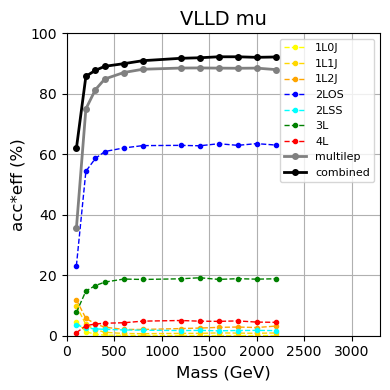

In [8]:
print_info('VLLD', 'mu') 